• DOMAIN: Automobile

• CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette.

The vehicle may be viewed from one of many different angles.

• DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles
were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of
vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more
difficult to distinguish between the cars

• PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the
model using just the raw data.




1. Data: Import, clean and pre-process the data

2.EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden
patterns by using all possible methods.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as  np

from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("C:/Users/HP/Downloads/vehicle-1 (1).csv")

In [3]:
df

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [4]:
df["class"].unique() 

array(['van', 'car', 'bus'], dtype=object)

In [5]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [6]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
df = df.replace('?', np.nan)

In [8]:
df.shape

(846, 19)

In [9]:
df[df.isnull().any(axis=1)]

compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
9             93         44.0                  98.0           NaN   
19           101         56.0                 100.0         215.0   
35           100         46.0                   NaN         172.0   
66            81         43.0                  68.0         125.0   
70            96         55.0                  98.0         161.0   
77            86         40.0                  62.0         140.0   
78           104         52.0                  94.0           NaN   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   
141           81         42.0                  63.0         125.0   
159           91         45.0                  75.0           NaN   
177           89         44.0                  72.0         160.0   
192           93         43.0                  76.0         149.0   
207           85         42.0                   NaN         121.0   
215           90         39.0                  86.0         169.0   
222          100         50.0                  81.0         197.0   
237           85         45.0                  65.0         128.0   
249           85         34.0                  53.0         127.0   
266           86          NaN                  65.0         116.0   
273           96         45.0                  80.0         162.0   
285           89         48.0                  85.0         189.0   
287           88         43.0                  84.0           NaN   
308          109         51.0                 100.0         197.0   
319          102         51.0                   NaN         194.0   
329           89         38.0                  80.0         169.0   
345          101         54.0                 106.0           NaN   
372           97         47.0                  87.0         164.0   
396          108          NaN                 106.0         177.0   
419           93         34.0                  72.0         144.0   
467           96         54.0                 104.0           NaN   
496          106         55.0                  98.0         224.0   
522           89         36.0                  69.0         162.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
9                    62.0                       11          183.0   
19                    NaN                       10          208.0   
35                   67.0                        9          157.0   
66                   57.0                        8          149.0   
70                   54.0                       10          215.0   
77                   62.0                        7          150.0   
78                   66.0                        5          208.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   
141                  55.0                        8          149.0   
159                  57.0                        6          150.0   
177                  66.0                        7          144.0   
192                  57.0                        7          149.0   
207                  55.0                        7          149.0   
215                  62.0                        7          162.0   
222                   NaN                        6          186.0   
237                  56.0                        8          151.0   
249                  58.0                        6            NaN   
266                  53.0                        6          152.0   
273                  63.0                        9          146.0   
285                  64.0                        8          169.0   
287                  55.0                       11          154.0   
30

In [10]:
df.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [11]:
df_var=df.drop('class',axis=1)
df_var=df_var.apply(lambda x: x.fillna(x.median()),axis=0)

Since there are two types are cars sub-groups within the CARS class type we are going to use clustering to extract them

In [12]:
filt=(df['class']!='car')
df_others=df.loc[filt]

In [13]:
filt=(df['class']=='car')
df_car=df.loc[filt]

In [14]:
df_car_var=df_car.drop('class',axis=1)
df_car_var=df_car_var.apply(lambda x: x.fillna(x.median()),axis=0)

In [15]:
from scipy.stats import zscore
df_car_var_z = df_car_var.apply(zscore)
X=df_car_var_z

In [16]:
X

compactness  circularity  distance_circularity  radius_ratio  \
2       0.896094     0.564590              1.051486      0.916016   
9      -0.365065    -0.289763              0.560172      0.173404   
11     -0.709018    -1.713686             -1.405082     -1.440970   
15     -0.021113     1.276552              0.867243      0.657716   
18      0.896094     1.134160              0.683000      0.173404   
..           ...          ...                   ...           ...   
837    -0.250415    -0.004979             -0.729526     -0.375483   
840    -0.365065    -1.713686             -1.405082     -1.311820   
841    -0.365065    -1.001725             -0.115384      0.076542   
843     1.125395     1.134160              0.744415      1.335753   
844    -1.167621    -1.428902             -0.668112     -1.118095   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
2                1.083514                 0.569150       0.811345   
9                0.217914                 1.053606       0.060594   
11              -1.296888                -1.368671      -1.816284   
15               0.867114                 0.084695       0.717501   
18               0.001513                 0.569150       1.092877   
..                    ...                      ...            ...   
837             -0.214887                -0.399760      -0.721439   
840             -1.080488                -0.884216      -1.597315   
841              0.650714                -0.399760      -0.377344   
843              1.299915                 1.538061       1.280565   
844             -0.647687                -0.884216      -1.440909   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
2        -0.802204                0.595992                   0.467751   
9        -0.275182                0.195239                  -0.231025   
11        2.096419               -1.808528                  -1.861502   
15       -0.802204                0.595992                   0.933602   
18       -0.933960                0.996745                   1.341221   
..             ...                     ...                        ...   
837       0.515352               -0.606268                  -0.114562   
840       1.701152               -1.407774                  -1.745040   
841       0.251841               -0.606268                  -0.929801   
843      -1.065716                1.397499                   1.341221   
844       1.569397               -1.407774                  -1.512114   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
2           0.887284           0.803126                   1.182048   
9           0.143975           0.026312                  -0.808181   
11         -1.767389          -1.652803                  -1.803295   
15          1.028866           0.737396                   1.943017   
18          0.958075           1.107876                   1.182048   
..               ...                ...                        ...   
837        -0.599333          -0.762454                   0.040593   
840        -1.661202          -1.491464                  -1.920367   
841         0.073184          -0.469654                  -0.895985   
843         1.064262           1.317019                   0.596686   
844        -1.519620          -1.377930                  -0.925253   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
2                       0.597495        1.248361         -0.611238   
9                      -1.151503       -0.566437         -0.115733   
11                     -0.957170       -0.384957          1.073478   
15                      0.791828       -0.203477         -1.304945   
18                      0.791828       -0.384957         -0.413036   
..                           ...             ...               ...   
837                    -0.568504        0.885401         -1.304945   
840                    -1.540169       -0.384957          1.370781   

In [17]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Let us check optimal number of clusters-
distortion = []

cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  centroids = clusters.cluster_centers_         
  cluster_errors.append( clusters.inertia_ )    
  distortion.append(sum(np.min(distance.cdist(X, clusters.cluster_centers_, 'euclidean'), axis=1))/ X.shape[0])
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

num_clusters  cluster_errors
0             1     7722.000000
1             2     3920.862881
2             3     2942.285000
3             4     2626.441019
4             5     2415.808234
5             6     2215.240609
6             7     2089.932268
7             8     1985.145162
8             9     1871.739483

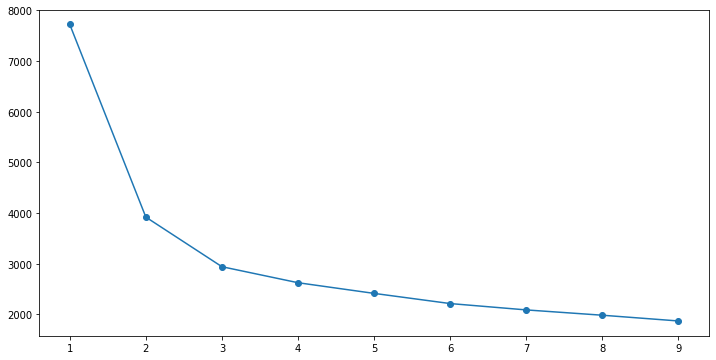

In [18]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Since from the above chart, we can see there are clearly two dominant clusters present hence the two type of cars

In [19]:
cluster = KMeans( n_clusters = 2, random_state = 2354 )
cluster.fit(X)
prediction= cluster.predict(X)  
df_car["group"] = prediction 

In [20]:
df_car

compactness  circularity  distance_circularity  radius_ratio  \
2            104         50.0                 106.0         209.0   
9             93         44.0                  98.0           NaN   
11            90         34.0                  66.0         136.0   
15            96         55.0                 103.0         201.0   
18           104         54.0                 100.0         186.0   
..           ...          ...                   ...           ...   
837           94         46.0                  77.0         169.0   
840           93         34.0                  66.0         140.0   
841           93         39.0                  87.0         183.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
2                    66.0                       10          207.0   
9                    62.0                       11          183.0   
11                   55.0                        6          123.0   
15                   65.0                        9          204.0   
18                   61.0                       10          216.0   
..                    ...                      ...            ...   
837                  60.0                        8          158.0   
840                  56.0                        7          130.0   
841                  64.0                        8          169.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
2             32.0                    23.0                        158   
9             36.0                    22.0                        146   
11            54.0                    17.0                        118   
15            32.0                    23.0                        166   
18            31.0                    24.0                        173   
..             ...                     ...                        ...   
837           42.0                    20.0                        148   
840           51.0                    18.0                        120   
841           40.0                    20.0                        134   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
2              223.0              635.0                      220.0   
9              202.0              505.0                      152.0   
11             148.0              224.0                      118.0   
15             227.0              624.0                      246.0   
18             225.0              686.0                      220.0   
..               ...                ...                        ...   
837            181.0              373.0                      181.0   
840            151.0              251.0                      114.0   
841            200.0              422.0                      149.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
2                           73.0            14.0               9.0   
9                           64.0             4.0              14.0   
11                          65.0             5.0              26.0   
15                          74.0             6.0               2.0   
18                          74.0             5.0              11.0   
..                           ...             ...               ...   
837                         67.0            12.0               2.0   
840                         62.0             5.0              29.0   

In [21]:
df=pd.concat([df_others,df_car],axis=0,ignore_index=True)

In [22]:
df

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2             93         41.0                  82.0         159.0   
3             85         44.0                  70.0         205.0   
4            107          NaN                 106.0         172.0   
..           ...          ...                   ...           ...   
841           94         46.0                  77.0         169.0   
842           93         34.0                  66.0         140.0   
843           93         39.0                  87.0         183.0   
844          106         54.0                 101.0         222.0   
845           86         36.0                  78.0         146.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    63.0                        9          144.0   
3                   103.0                       52          149.0   
4                    50.0                        6          255.0   
..                    ...                      ...            ...   
841                  60.0                        8          158.0   
842                  56.0                        7          130.0   
843                  64.0                        8          169.0   
844                  67.0                       12          222.0   
845                  58.0                        7          135.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             46.0                    19.0                        143   
3             45.0                    19.0                        144   
4             26.0                    28.0                        169   
..             ...                     ...                        ...   
841           42.0                    20.0                        148   
842           51.0                    18.0                        120   
843           40.0                    20.0                        134   
844           30.0                    25.0                        173   
845           50.0                    18.0                        124   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              160.0              309.0                      127.0   
3              241.0              325.0                      188.0   
4              280.0              957.0                      264.0   
..               ...                ...                        ...   
841            181.0              373.0                      181.0   
842            151.0              251.0                      114.0   
843            200.0              422.0                      149.0   
844            228.0              721.0                      200.0   
845            155.0              270.0                      148.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           63.0             6.0              10.0   
3                          127.0             9.0              11.0   
4                           85.0             5.0               9.0   
..                           ...             ...               ...   
841                         67.0            12.0               2.0   
842                         62.0             5.0              29.0   

In [23]:
df['group'] = df['group'].replace(np.nan, 0)

In [24]:
df

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2             93         41.0                  82.0         159.0   
3             85         44.0                  70.0         205.0   
4            107          NaN                 106.0         172.0   
..           ...          ...                   ...           ...   
841           94         46.0                  77.0         169.0   
842           93         34.0                  66.0         140.0   
843           93         39.0                  87.0         183.0   
844          106         54.0                 101.0         222.0   
845           86         36.0                  78.0         146.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    63.0                        9          144.0   
3                   103.0                       52          149.0   
4                    50.0                        6          255.0   
..                    ...                      ...            ...   
841                  60.0                        8          158.0   
842                  56.0                        7          130.0   
843                  64.0                        8          169.0   
844                  67.0                       12          222.0   
845                  58.0                        7          135.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             46.0                    19.0                        143   
3             45.0                    19.0                        144   
4             26.0                    28.0                        169   
..             ...                     ...                        ...   
841           42.0                    20.0                        148   
842           51.0                    18.0                        120   
843           40.0                    20.0                        134   
844           30.0                    25.0                        173   
845           50.0                    18.0                        124   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              160.0              309.0                      127.0   
3              241.0              325.0                      188.0   
4              280.0              957.0                      264.0   
..               ...                ...                        ...   
841            181.0              373.0                      181.0   
842            151.0              251.0                      114.0   
843            200.0              422.0                      149.0   
844            228.0              721.0                      200.0   
845            155.0              270.0                      148.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           63.0             6.0              10.0   
3                          127.0             9.0              11.0   
4                           85.0             5.0               9.0   
..                           ...             ...               ...   
841                         67.0            12.0               2.0   
842                         62.0             5.0              29.0   

In [25]:
def Corgie_name(col):
    Class=col[0]
    group=col[1]
    if(Class=='van'):
        return 'Cheverolet_van'
    elif(Class=='bus'):
        return 'Double_decker_bus'
    elif(Class=='car'):
        if group==1:
            return 'Saab_9000'
        else:
            return 'Opel_Manta_400'

df['class']=df[['class','group']].apply(Corgie_name,axis=1)


In [26]:
df

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2             93         41.0                  82.0         159.0   
3             85         44.0                  70.0         205.0   
4            107          NaN                 106.0         172.0   
..           ...          ...                   ...           ...   
841           94         46.0                  77.0         169.0   
842           93         34.0                  66.0         140.0   
843           93         39.0                  87.0         183.0   
844          106         54.0                 101.0         222.0   
845           86         36.0                  78.0         146.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    63.0                        9          144.0   
3                   103.0                       52          149.0   
4                    50.0                        6          255.0   
..                    ...                      ...            ...   
841                  60.0                        8          158.0   
842                  56.0                        7          130.0   
843                  64.0                        8          169.0   
844                  67.0                       12          222.0   
845                  58.0                        7          135.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             46.0                    19.0                        143   
3             45.0                    19.0                        144   
4             26.0                    28.0                        169   
..             ...                     ...                        ...   
841           42.0                    20.0                        148   
842           51.0                    18.0                        120   
843           40.0                    20.0                        134   
844           30.0                    25.0                        173   
845           50.0                    18.0                        124   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              160.0              309.0                      127.0   
3              241.0              325.0                      188.0   
4              280.0              957.0                      264.0   
..               ...                ...                        ...   
841            181.0              373.0                      181.0   
842            151.0              251.0                      114.0   
843            200.0              422.0                      149.0   
844            228.0              721.0                      200.0   
845            155.0              270.0                      148.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           63.0             6.0              10.0   
3                          127.0             9.0              11.0   
4                           85.0             5.0               9.0   
..                           ...             ...               ...   
841                         67.0            12.0               2.0   
842                         62.0             5.0              29.0   

In [27]:
df['class'].unique()

array(['Cheverolet_van', 'Double_decker_bus', 'Opel_Manta_400',
       'Saab_9000'], dtype=object)

There are few missing values present in each feature so lets impute them

In [30]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
group                          0
dtype: int64

In [31]:
df.median()
df_var=df.drop(['class','group'],axis=1)
df_var=df_var.apply(lambda x: x.fillna(x.median()),axis=0)

In [32]:
df_var['class']=df['class']

In [33]:
df_var

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2             93         41.0                  82.0         159.0   
3             85         44.0                  70.0         205.0   
4            107         44.0                 106.0         172.0   
..           ...          ...                   ...           ...   
841           94         46.0                  77.0         169.0   
842           93         34.0                  66.0         140.0   
843           93         39.0                  87.0         183.0   
844          106         54.0                 101.0         222.0   
845           86         36.0                  78.0         146.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    63.0                        9          144.0   
3                   103.0                       52          149.0   
4                    50.0                        6          255.0   
..                    ...                      ...            ...   
841                  60.0                        8          158.0   
842                  56.0                        7          130.0   
843                  64.0                        8          169.0   
844                  67.0                       12          222.0   
845                  58.0                        7          135.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             46.0                    19.0                        143   
3             45.0                    19.0                        144   
4             26.0                    28.0                        169   
..             ...                     ...                        ...   
841           42.0                    20.0                        148   
842           51.0                    18.0                        120   
843           40.0                    20.0                        134   
844           30.0                    25.0                        173   
845           50.0                    18.0                        124   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              160.0              309.0                      127.0   
3              241.0              325.0                      188.0   
4              280.0              957.0                      264.0   
..               ...                ...                        ...   
841            181.0              373.0                      181.0   
842            151.0              251.0                      114.0   
843            200.0              422.0                      149.0   
844            228.0              721.0                      200.0   
845            155.0              270.0                      148.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           63.0             6.0              10.0   
3                          127.0             9.0              11.0   
4                           85.0             5.0               9.0   
..                           ...             ...               ...   
841                         67.0            12.0               2.0   
842                         62.0             5.0              29.0   

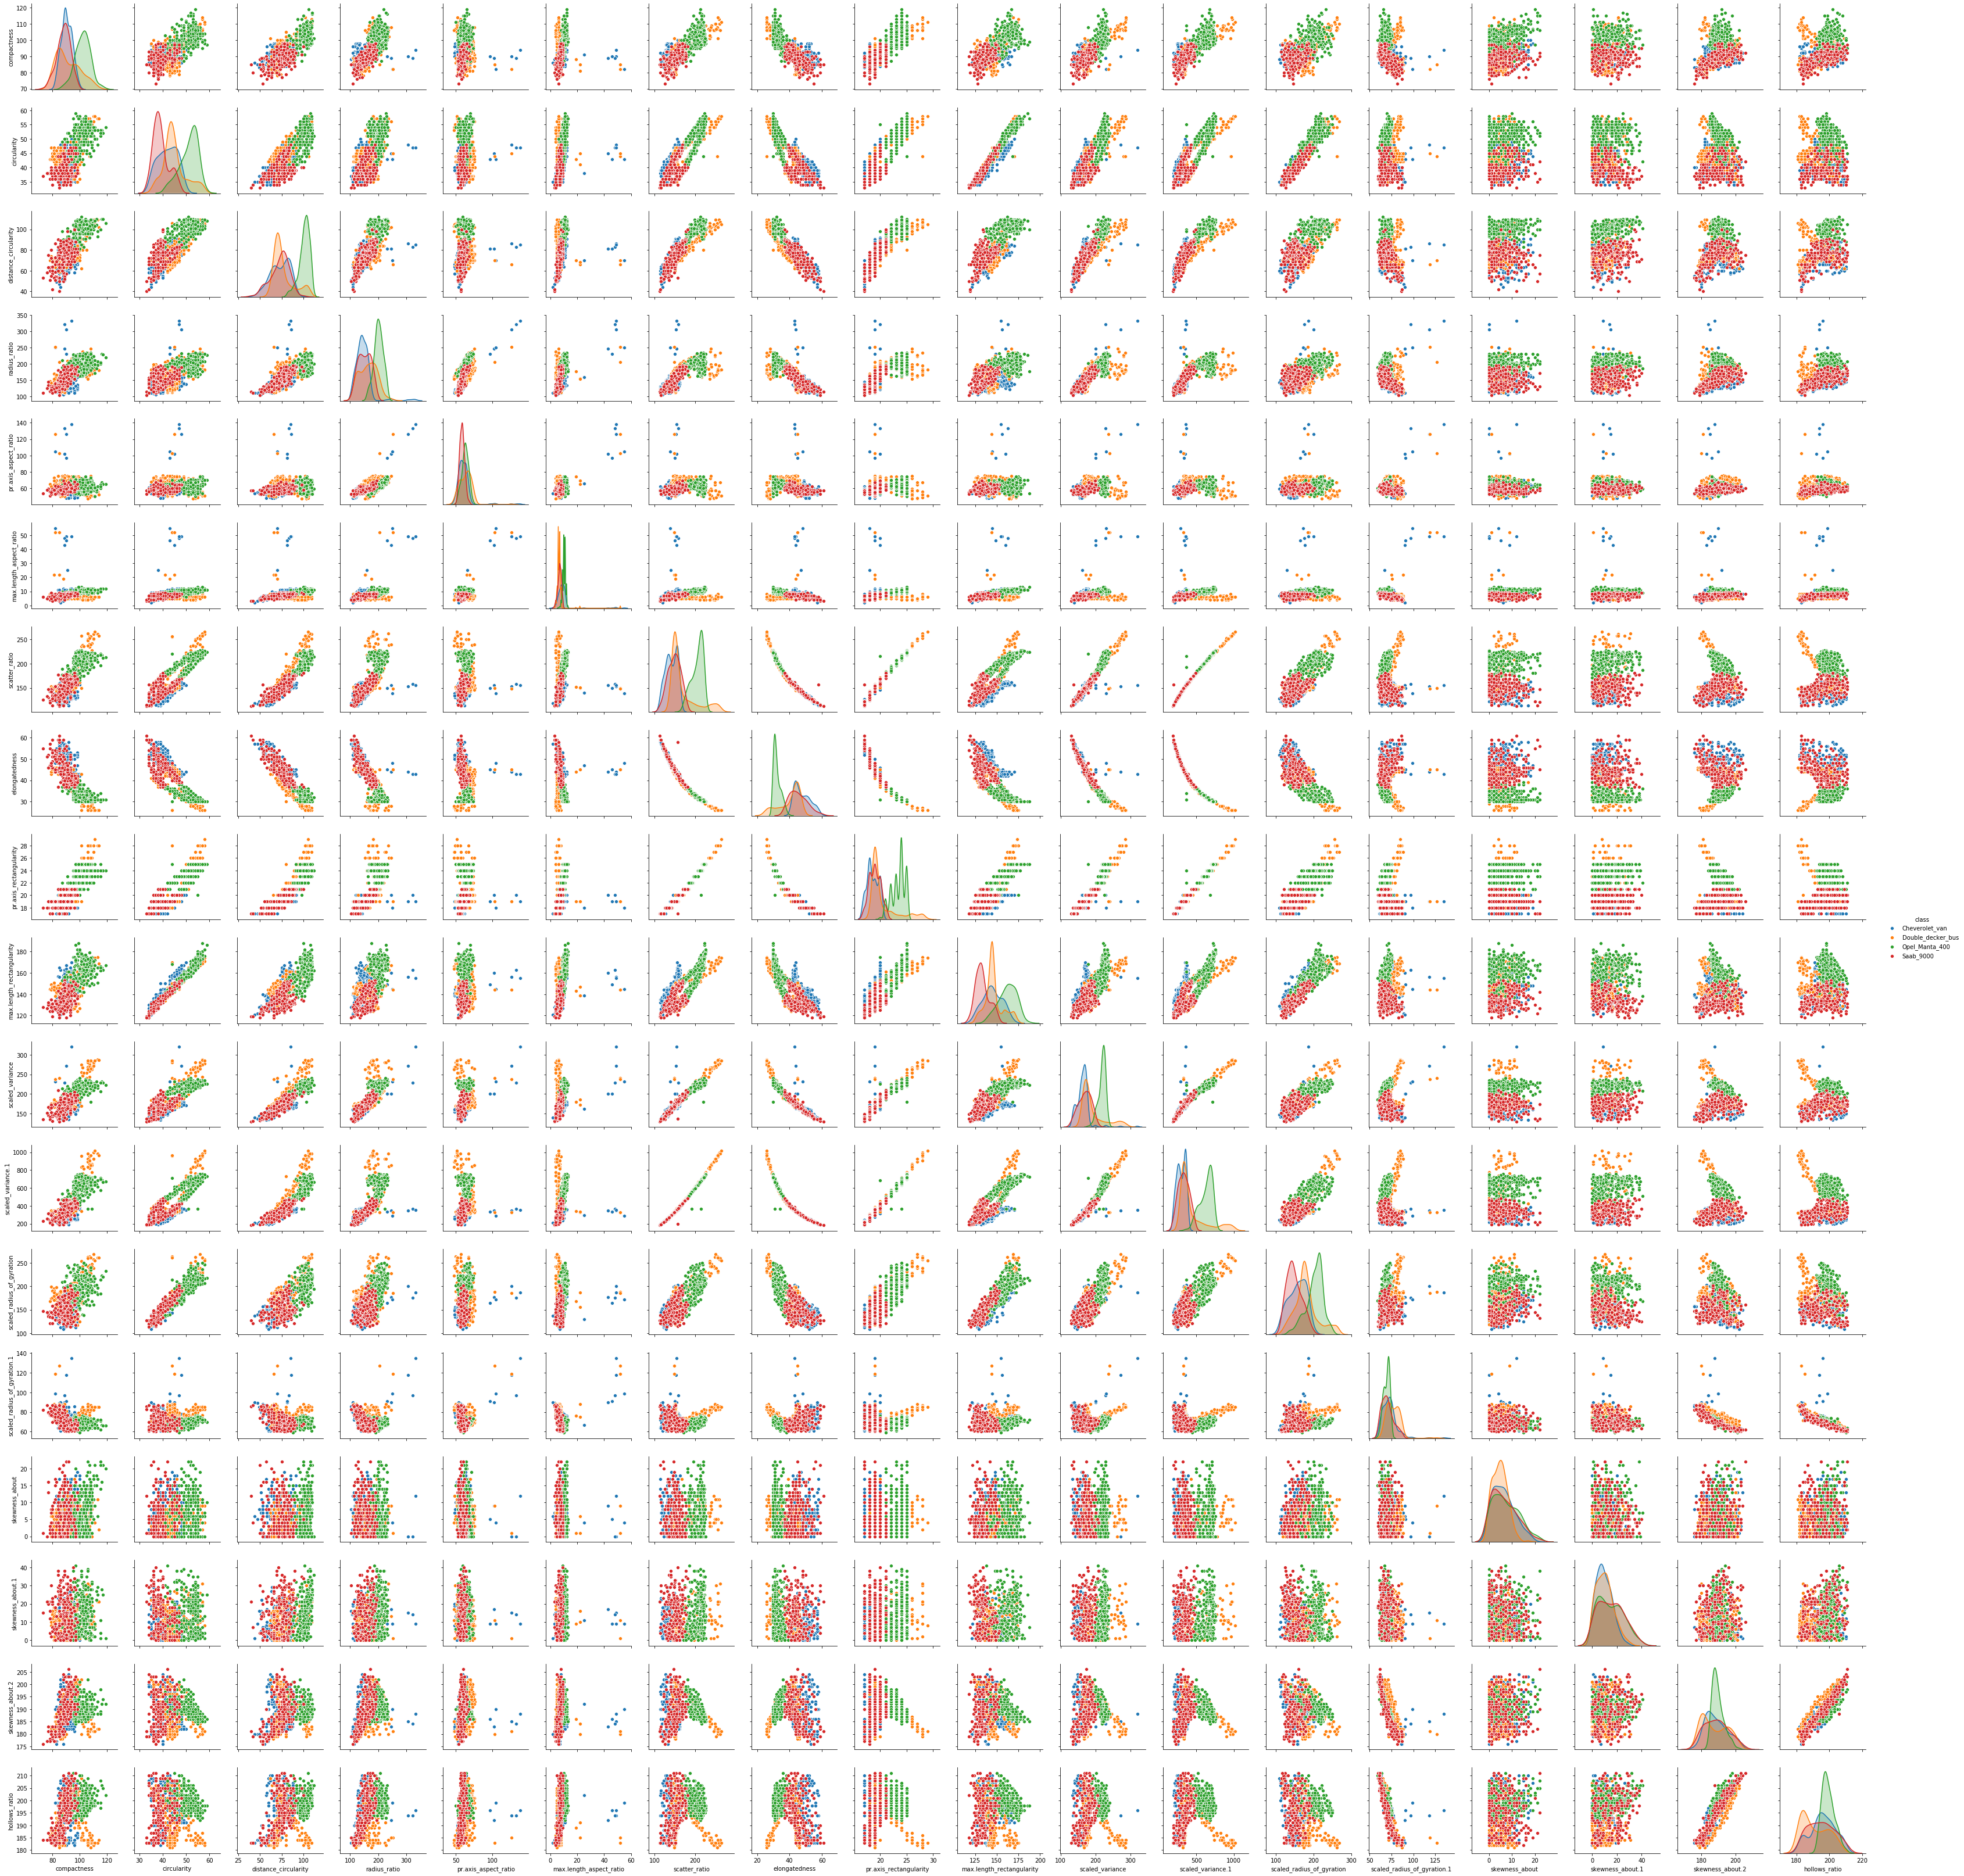

In [34]:
sns.pairplot(df_var, diag_kind='kde', hue = 'class') 

Using a Plain SVM model on the processed data, without the help of PCA

In [37]:
target = df_var["class"]
features = df_var.drop(["class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.3, random_state = 43)
X_train_z=sc.fit_transform(X_train)
X_test_z=sc.transform(X_test)
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train_z, y_train)

prediction = svc_model .predict(X_test_z)

In [38]:
print(svc_model.score(X_train_z, y_train))
print(svc_model.score(X_test_z, y_test))

0.9611486486486487
0.9173228346456693


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[47  3  0  6]
 [ 1 59  0  3]
 [ 0  0 76  2]
 [ 3  1  2 51]]


Using several kernel tricks to find out which gives the highest performance

In [40]:
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train_z, y_train)

prediction = svc_model.predict(X_test_z)
print(svc_model.score(X_train_z, y_train))
print(svc_model.score(X_test_z, y_test))

0.8699324324324325
0.8307086614173228


In [41]:
svc_model  = SVC(kernel='sigmoid')
svc_model.fit(X_train_z, y_train)

prediction = svc_model.predict(X_test_z)
print(svc_model.score(X_train_z, y_train))
print(svc_model.score(X_test_z, y_test))

0.6756756756756757
0.6771653543307087


In [42]:
svc_model  = SVC(kernel='rbf')
svc_model.fit(X_train_z, y_train)

prediction = svc_model.predict(X_test_z)
print(svc_model.score(X_train_z, y_train))
print(svc_model.score(X_test_z, y_test))

0.981418918918919
0.937007874015748


We can infer from the metrics that the RBF method gives the best results

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[47  2  0  5]
 [ 0 61  0  1]
 [ 0  0 76  2]
 [ 4  0  2 54]]


In [44]:

from scipy.stats import zscore

df_var_f = df_var.drop('class',axis=1)
df_var_z = df_var_f.apply(zscore)
array = df_var_z.values
array

array([[ 0.16058035,  0.51807313,  0.05717723, ...,  0.3808703 ,
        -0.31201194,  0.18395733],
       [-0.32546965, -0.62373151,  0.12074088, ...,  0.15679779,
         0.01326483,  0.45297703],
       [-0.08244465, -0.62373151, -0.00638642, ..., -0.29134724,
         1.63964869,  1.52905585],
       ...,
       [-0.08244465, -0.94996141,  0.31143182, ...,  1.38919659,
        -0.14937355, -0.08506238],
       [ 1.49721783,  1.49676282,  1.20132288, ..., -0.96356477,
        -0.31201194,  0.72199673],
       [-0.93303214, -1.43930625, -0.26064101, ...,  1.38919659,
         0.17590322, -0.08506238]])

Using a SVM model on the processed data, with the help of PCA

In [45]:
from sklearn.decomposition import PCA
pca = PCA(10)  
projected = pca.fit_transform(array)
print(projected.shape)

(846, 10)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(projected,target, test_size = 0.3, random_state = 43)
X_train_z=sc.fit_transform(X_train)
X_test_z=sc.transform(X_test)
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9290540540540541
0.9133858267716536


In [47]:
X_train, X_test, y_train, y_test = train_test_split(projected,target, test_size = 0.3, random_state = 43)
svc_model  = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9763513513513513
0.9330708661417323


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[46  2  0  6]
 [ 0 61  0  0]
 [ 0  0 76  2]
 [ 5  0  2 54]]


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(n_estimators = 150, learning_rate = 0.05)
gbcl.fit(X_train, y_train)
print("Training Score")
print(gbcl.score(X_train , y_train))
print("Testing Score")
print(gbcl.score(X_test , y_test))

Training Score
1.0
Testing Score
0.9212598425196851


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[46  2  0  6]
 [ 0 61  0  0]
 [ 0  0 76  2]
 [ 5  0  2 54]]
